**Cодержание**
- [Загрузка данных](#Загрузка-данных)
    - [Вывод](#Вывод)
- [Исследовательский анализ данных (EDA)](#Исследовательский-анализ-данных-(EDA))
    - [Вывод](#Вывод)
- [Модель прогнозирования оттока клиентов](#Модель-прогнозирования-оттока-клиентов)
    - [Вывод](#Вывод)
- [Кластеризация клиентов](#Кластеризация-клиентов)
    - [Вывод](#Вывод)
- [Общий вывод](#Общий-вывод)

# Загрузка данных

In [1]:
# Импорт необходим библеотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
try:
    gym_df = pd.read_csv('###')
except:
    gym_df = pd.read_csv('###')

In [3]:
# Для удобства переведем в нижний регистр все названия колонок
gym_df.columns = gym_df.columns.str.lower()

In [4]:
gym_df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
gym_df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [6]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

## Вывод

Файл загружен, пропущенных значений нет, можно двигаться к следующему шагу

# Исследовательский анализ данных (EDA)

Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения

In [7]:
gym_df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [8]:
df = gym_df.groupby('churn').mean().reset_index()
df['churn'] = df['churn'].map({0:'остался', 1:'ушел'})
df

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,остался,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,ушел,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Видно, что почти по каждому признаку видна разница в двух группах, кроме контактного телефона и пола клиента.


Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [9]:
lost = gym_df.query('churn == 1').drop('churn', axis=1)
still = gym_df.query('churn == 0').drop('churn', axis=1)

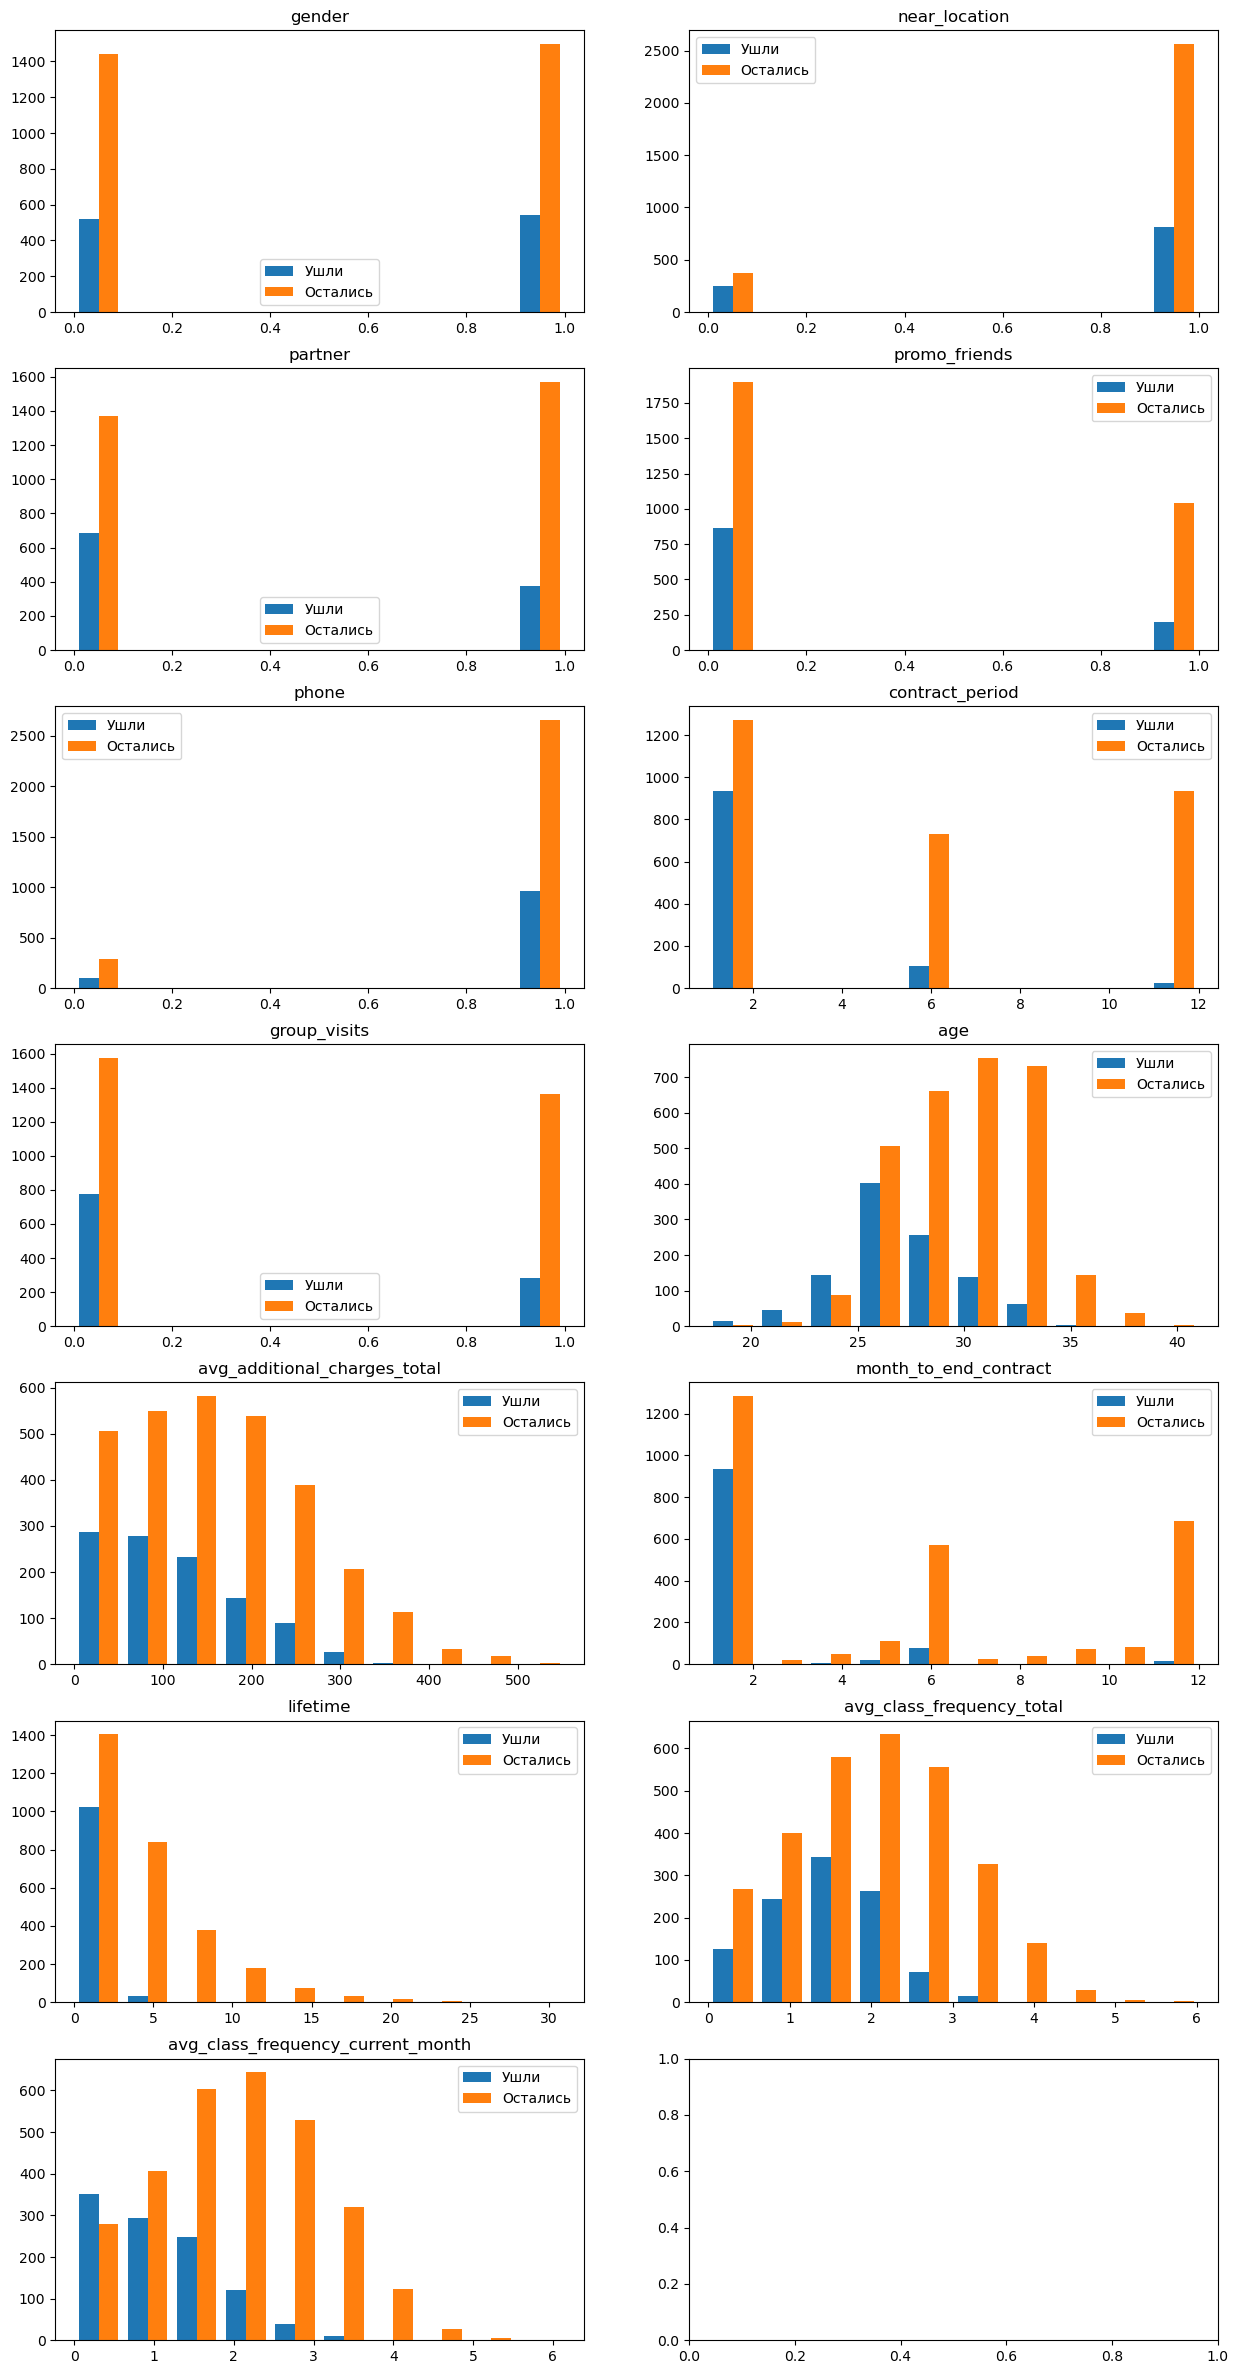

In [10]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))

for ax,column in zip(axes.flat, lost.columns):
    ax.hist([lost[column], still[column]], label=['Ушли', 'Остались'])
    ax.set(title=column)
    ax.legend()

plt.show()

Построим матрицу корреляций

In [11]:
corr = gym_df.drop('churn', axis=1).corr()
corr

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605


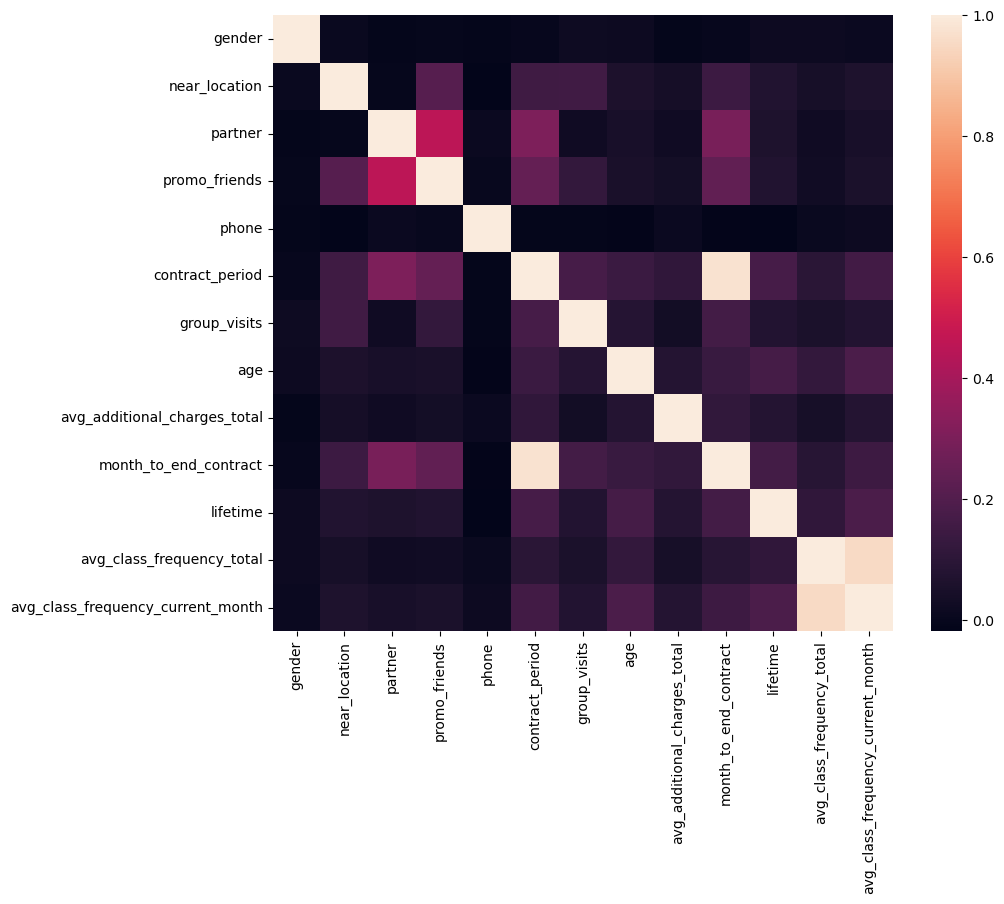

In [12]:
fig = plt.subplots(figsize=(10,8))
ax = sns.heatmap(gym_df.drop('churn', axis=1).corr())
plt.show()

## Вывод

- В датафрейме нет отсутствующих признаков
- Имеются две коррелирующие пары признаков 
    1. Длительность текущего действующего абонемента и срок его окончания абонемента
    2. Средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц;

# Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце
- Разделим данные на обучающую и валидационную выборку функцией `train_test_split()`

In [13]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_df.drop('churn', axis = 1)
y = gym_df['churn']

In [14]:
# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим модель на train-выборке двумя способами: *логистической регрессией*, *случайным лесом*.
Оценим метрики `accuracy`, `precision` и `recall` для обеих моделей на валидационной выборке. Сравним по ним модел

In [15]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{str(m)}')
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

In [16]:
# список моделей
models = [
    LogisticRegression(),
    RandomForestClassifier()
]

In [17]:
for mod in models:
    make_prediction(mod, 
                    X_train, 
                    y_train, 
                    X_test, 
                    y_test)

c:\Users\parna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
Accuracy:0.90 Precision:0.81 Recall:0.79
RandomForestClassifier()
Accuracy:0.92 Precision:0.85 Recall:0.82


## Вывод

Модель RandomForestClassifier() на основании метрик показала себя лучше 

# Кластеризация клиентов

Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов):
- Стандартизируем данные

In [18]:
# Стандартизируем данные
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(X) # обучаем нормализатор и преобразуем набор данных 

Построим матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисуем дендрограмму

In [19]:
# Чтобы диаграмма получилась показательной, лучше передать параметру method значение 'ward'
linked = linkage(x_sc, method = 'ward')

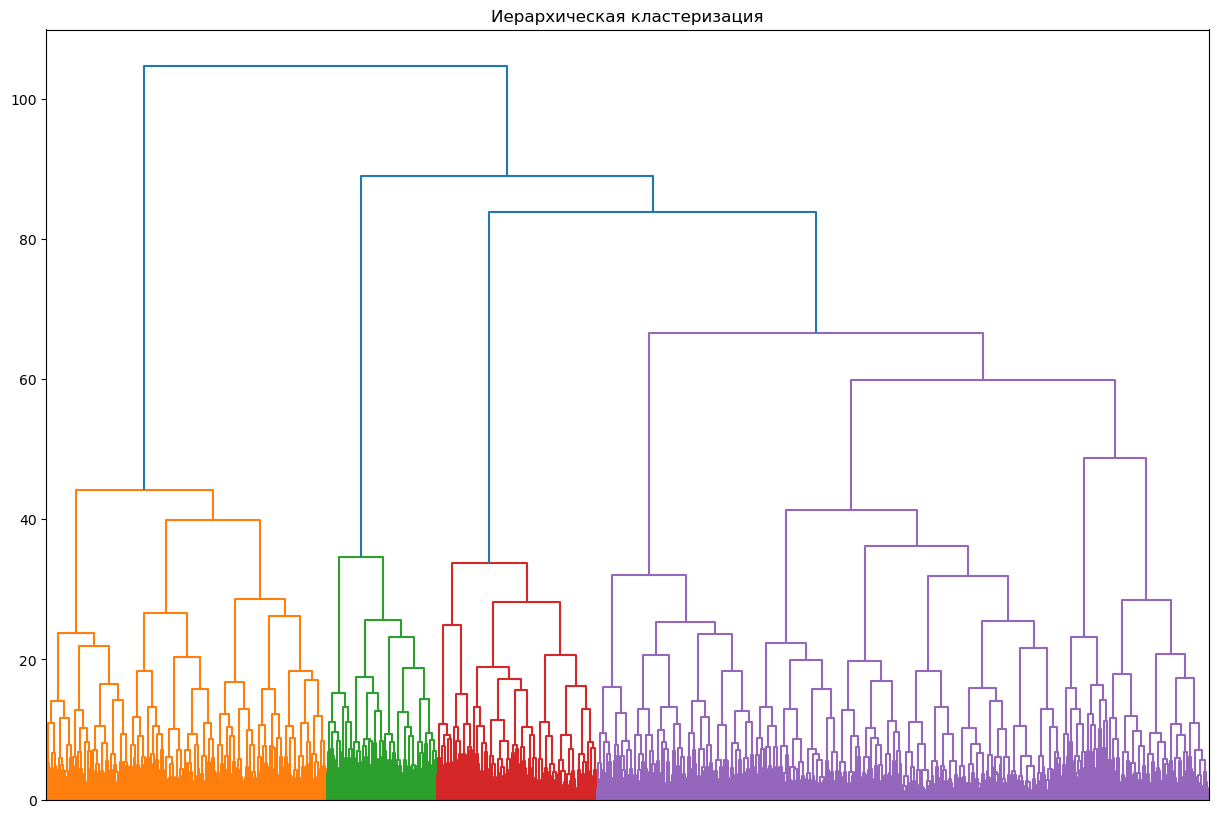

In [20]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', no_labels = "True")
plt.title('Иерархическая кластеризация')
plt.show()

> Можно выделить 5 кластеров

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [21]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводим ости результата
km = KMeans(n_clusters=5, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(x_sc)

In [22]:
# сохраняем метки кластера в поле нашего датасета
gym_df['cluster_km'] = labels

Посмотрим на средние значения признаков для кластеров

In [23]:
gym_df.groupby('cluster_km').mean().reset_index()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


> Обратим внимание что в 2 и 3 кластере высокий факт оттока клиентов

Построим распределения признаков для кластеров

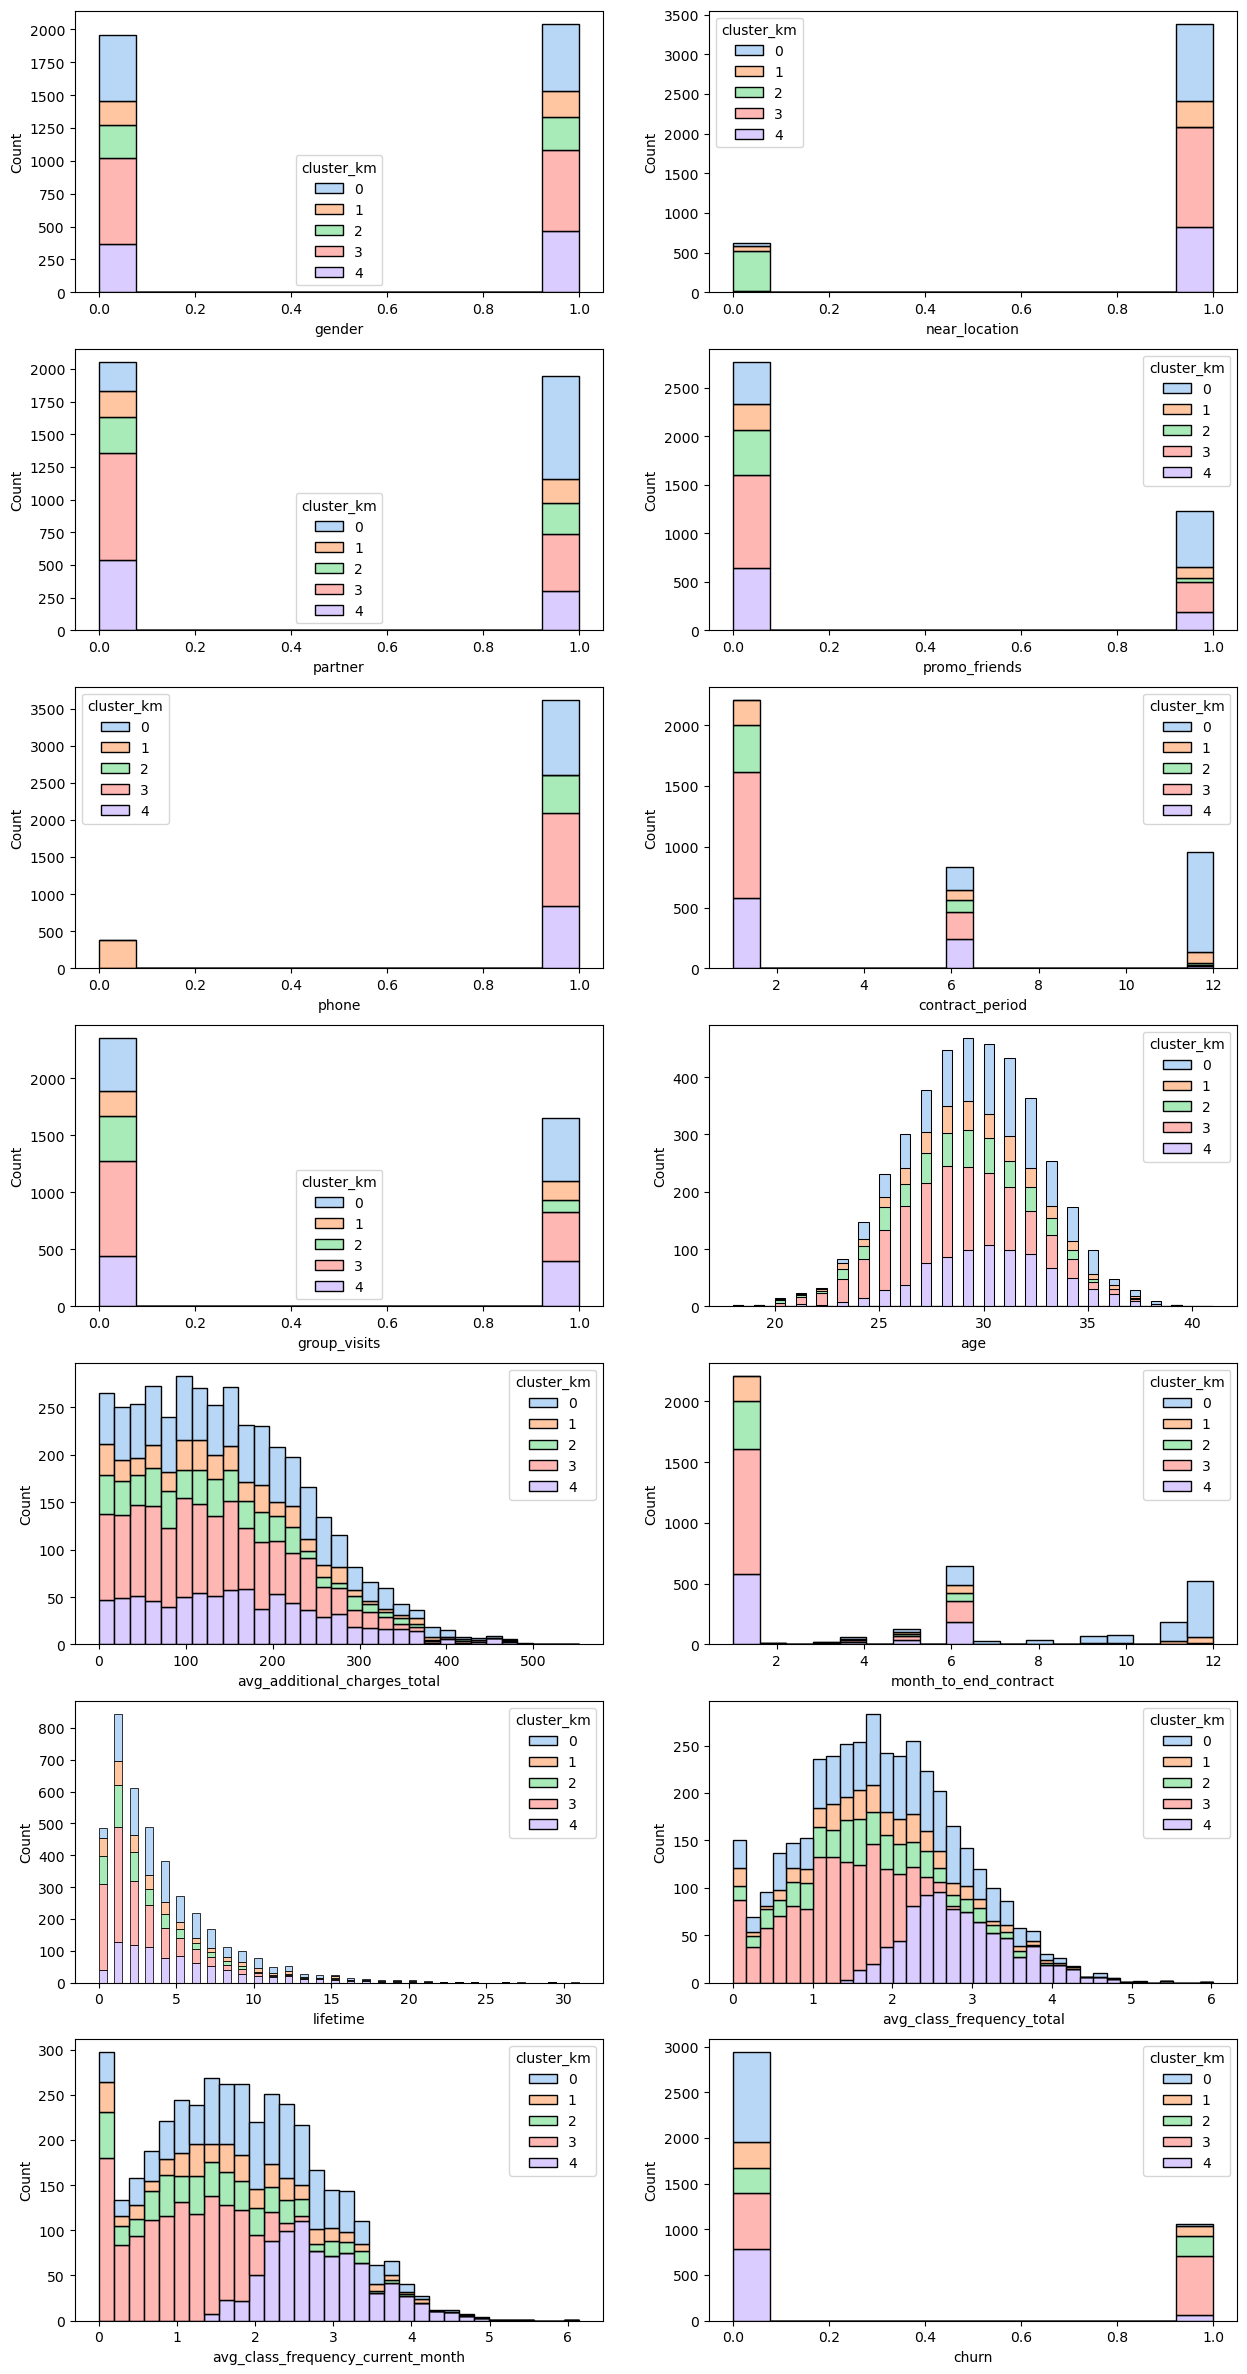

In [24]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))

for ax,column in zip(axes.flat, gym_df.columns):
    sns.histplot(data=gym_df, x=column, hue="cluster_km", multiple = 'stack', palette="pastel", ax=ax)
plt.show()

Обратим внимание на "проблемные" кластеры (2 и 3 кластер):
- Большинство пользователей из 2 кластера проживают или работают не в районе где находится фитнес-центр
- 2 и 3 кластер в основном покупают абонимент на 1 месяц
- В 2 и 3 кластере большинство пользователи до 30 лет

Для каждого полученного кластера посчитаем долю оттока

In [25]:
cluster = gym_df.groupby('cluster_km').agg(sum_churn=('churn', 'sum'), count_churn=('churn', 'count')).reset_index()
cluster['%'] = cluster['sum_churn'] / cluster['count_churn']
cluster.sort_values(by='%', ascending=False)

,cluster_km,sum_churn,count_churn,%
3,3,649,1262,0.514263
2,2,224,505,0.443564
1,1,103,385,0.267532
4,4,57,838,0.068019
0,0,28,1010,0.027723


## Вывод

Из 5 определеных нами кластера менее "надежными" являются 2 и 3 кластер

Попробуем составить портрет двух типов клиентов:

1. Признаки пользователей которые перестали заниматься:
    - Живут или работают далеко от фитнес-центра(кластер 2)
    - Берут абонименты на 1 месяц
    - Чаще моложе 30 лет
2. Признаки пользователей которые продолжают заниматься:
    - Живут или работают в районе где находится фитнес-центра
    - Чаще берут абонимент на 1 год(кластер 0)
    - Чаще старше 30 лет
    
Основными признаками, наиболее сильно влияющие на отток можно назвать:

1. Удаленость от фитнес центра
2. Короткий срок абонимента
3. Возраст

Рекомендации:

1. Открывать новые центры в других районах
2. Скидки при покупки абонимента на 6 или 12 месяцев
3. Для пользователей младше 30 лет разработать выгодный абонимент (например стунденческий)